# Example of loading a multi-resolution Zarr image from a public S3 repository

The images are taken from  the paper "SARS-CoV-2 productively Infects Human Gut Enterocytes" published May 2020 in Science: https://doi.org/10.1126/science.abc1669

The electron micrograph images can be viewed online in the [Image Data Resource](https://idr.openmicroscopy.org/webclient/?show=dataset-10201). Both images are over 13 gigapixels each!
- [hSIOs-1 (79360 x 167424 px, image ID 9822151)](https://idr.openmicroscopy.org/webclient/img_detail/9822151/?dataset=10201)
- [hSIOs-2 (144384 x 93184 px, image ID 9822152)](https://idr.openmicroscopy.org/webclient/img_detail/9822152/?dataset=10201)

### Install dependencies if required
The cell below will install dependencies if you choose to run the notebook in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true). 

In [ ]:
%pip install zarr fsspec>=0.3.3 aiohttp

In [1]:
import dask.array as da
from IPython.display import display, Image
from matplotlib import pyplot as plt
import requests
import zarr

The Zarr data is stored separately from the IDR, on an S3 object store

In [2]:
# imageid = 9822151
imageid = 9822152

endpoint = 'https://uk1s3.embassy.ebi.ac.uk'
imagepath = f'idr/zarr/v0.1/{imageid}.zarr'

The original image is over 25GB but with the help of [Dask](https://dask.org/) it is easy to lazily load just the required regions of the image.

Images are stored as 5D arrays: multi-channel (`C`) 3D (`X Y Z`) timelapse (`T`) images. The order of the array dimensions are `(T, C, Z, Y, X)`. Since these images are so big downsampled versions ("multi-resolutions") have also been calculated.

The list of resolutions is stored in a JSON file called `.zattrs`. Dask automatically creates a nice summary of each resolution in Jupyter. These resolutions will always be stored in order from the largest image (most detailed resolution) to the smallest. Note that although the name of each resolution may be informative this is not always the case so you should not rely on it.

For the official specification of Zarr images see https://github.com/ome/ngff

In [3]:
def da_from_image(resolution):
    return da.from_zarr(f'{endpoint}/{imagepath}/{resolution}')

zattrs = requests.get(f'{endpoint}/{imagepath}/.zattrs').json()
resolutions = [d['path'] for d in zattrs['multiscales'][0]['datasets']]

darrays = {}
for resolution in resolutions:
    print(f'Resolution: "{resolution}"')
    a = da_from_image(resolution)
    darrays[resolution] = a
    display(a)

Resolution: "0"


dask.array<from-zarr, shape=(1, 1, 1, 93184, 144384), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "1"


dask.array<from-zarr, shape=(1, 1, 1, 46592, 72192), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "2"


dask.array<from-zarr, shape=(1, 1, 1, 23296, 36096), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "3"


dask.array<from-zarr, shape=(1, 1, 1, 11648, 18048), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "4"


dask.array<from-zarr, shape=(1, 1, 1, 5824, 9024), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "5"


dask.array<from-zarr, shape=(1, 1, 1, 2912, 4512), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "6"


dask.array<from-zarr, shape=(1, 1, 1, 1456, 2256), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "7"


dask.array<from-zarr, shape=(1, 1, 1, 728, 1128), dtype=>u2, chunksize=(1, 1, 1, 728, 1024), chunktype=numpy.ndarray>

Resolution: "8"


dask.array<from-zarr, shape=(1, 1, 1, 364, 564), dtype=>u2, chunksize=(1, 1, 1, 364, 564), chunktype=numpy.ndarray>

Resolution: "9"


dask.array<from-zarr, shape=(1, 1, 1, 182, 282), dtype=>u2, chunksize=(1, 1, 1, 182, 282), chunktype=numpy.ndarray>

Resolution: "10"


dask.array<from-zarr, shape=(1, 1, 1, 91, 141), dtype=>u2, chunksize=(1, 1, 1, 91, 141), chunktype=numpy.ndarray>

Display the smallest resolution image. In this image `T`, `C`, `Z` are all singleton dimensions

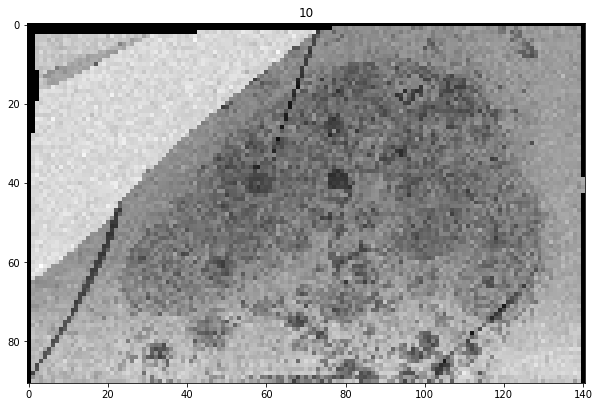

In [5]:
r = resolutions[-1]
a0 = darrays[r][0, 0, 0, :, :]
plt.figure(figsize=(10, 10))
plt.imshow(a0, cmap='gray')
plt.title(r);

As you can see it very low resolution, so let's look at the 3rd smallest resolution instead.

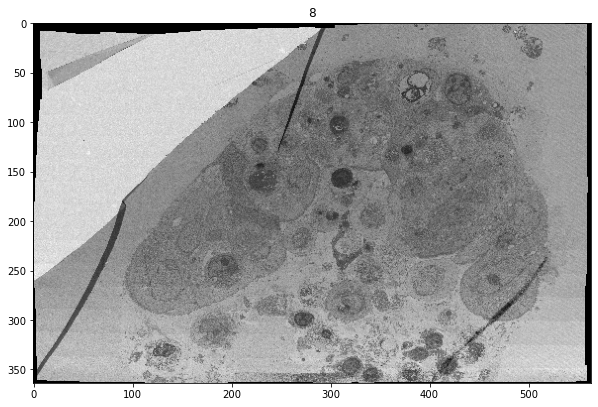

In [6]:
r = resolutions[-3]
a0 = darrays[r][0, 0, 0, :, :]
plt.figure(figsize=(10, 10))
plt.imshow(a0, cmap='gray')
plt.title(r);

Now "zoom in" to the centre of image by showing the same number of pixels but at the next resolution up

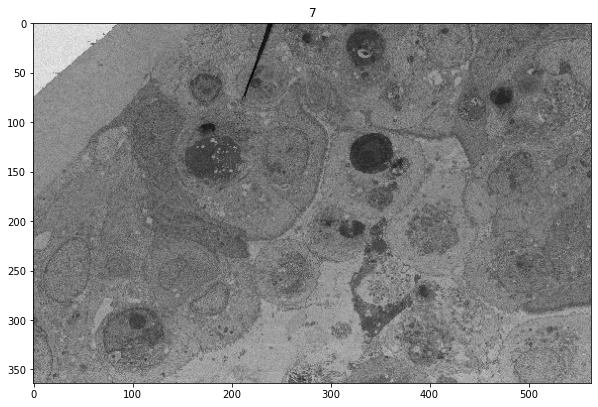

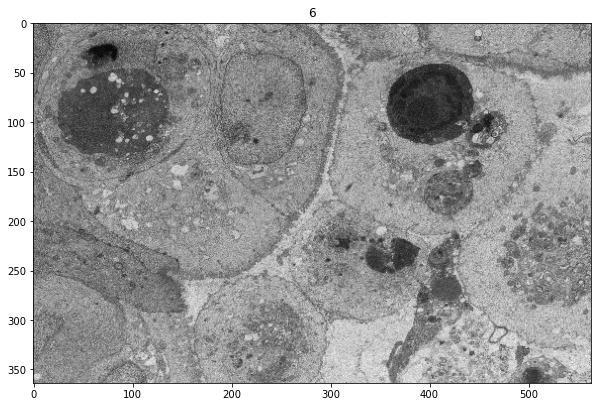

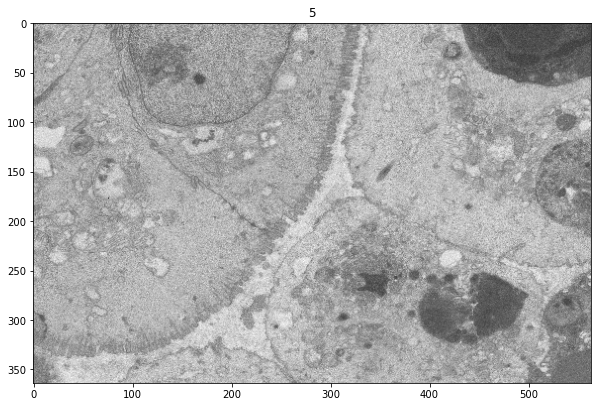

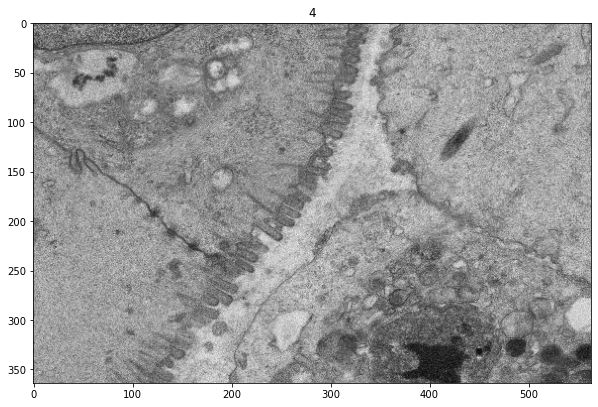

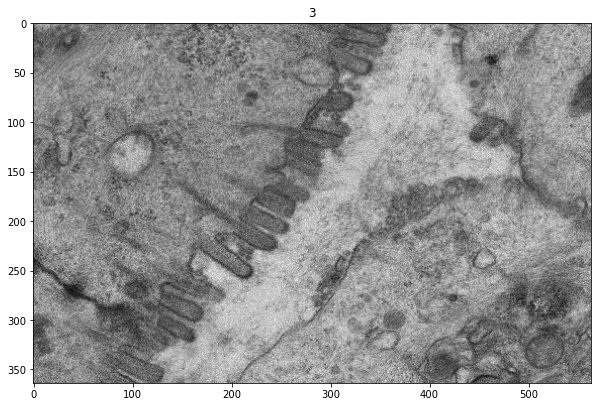

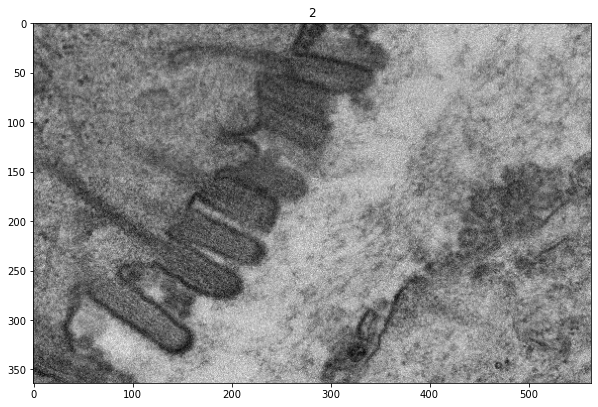

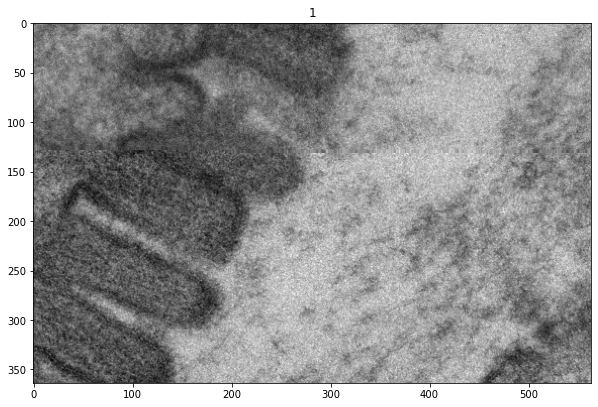

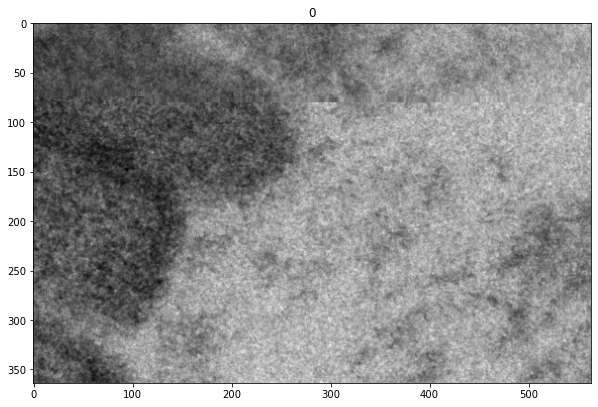

In [7]:
dy = int(a0.shape[0] / 2)
dx = int(a0.shape[1] / 2)

for r in reversed(resolutions[:-3]):
    a = darrays[r][0, 0, 0, :, :]
    # Change the following line to zoom into a different location
    cy, cx = int(a.shape[0] / 2), int(a.shape[1] / 2)
    region = a[cy-dy:cy+dy, cx-dx:cx+dx]
    plt.figure(figsize=(10, 10))
    plt.imshow(a[cy-dy:cy+dy, cx-dx:cx+dx], cmap='gray')
    plt.title(r)
    plt.show()

### License (BSD 2-Clause)
Copyright (C) 2020-2022 University of Dundee. All Rights Reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.